In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats
import os

### 2. Load and prepare the dataset
Load the dataset into a dataframe named df_data.
Drop the name column. This column is not a feature required by the model.
Create a dataframe named X containing all the columns except the status.
Create a dataframe named y containing the status.


In [7]:
df_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/parkinsons.data')

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### 3. Split the dataset into a training set and a test set

In [10]:
df_data = df_data.drop(['name'], axis=1)
X = df_data.drop(['status'], axis=1)
y = df_data['status']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 4. Create the model
Instantiate a Logistic Regression classifier with a lbfgs solver and penalty set to 'none'.
Fit the classifier to the data.
If the algorithm fails to converge, what change can you make to fix that?

In [37]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000, random_state=2)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, penalty='none', random_state=2)

### 5. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [38]:

lr.score(X_test, y_test)

0.8367346938775511

### 6. L2 Regularization
Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [39]:
lr_regular = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000, random_state=2)
lr_regular.fit(X_train, y_train)

lr_regular.score(X_test, y_test)

0.8775510204081632

Regularization improved the accuracy

### 7. Choose the C parameter
Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.

Answer a few assessment questions when you're done with this exercise and you will be asked to submit your notebook for this exercise after the questions.

In [41]:
c_vals = np.arange(.05, 2, .05)

test_scores = []
train_scores = []

for c in c_vals:
    lr_regular = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=1000, random_state=2)
    lr_regular.fit(X_train, y_train)
    
    test_scores.append(lr_regular.score(X_test, y_test))
    train_scores.append(lr_regular.score(X_train, y_train))

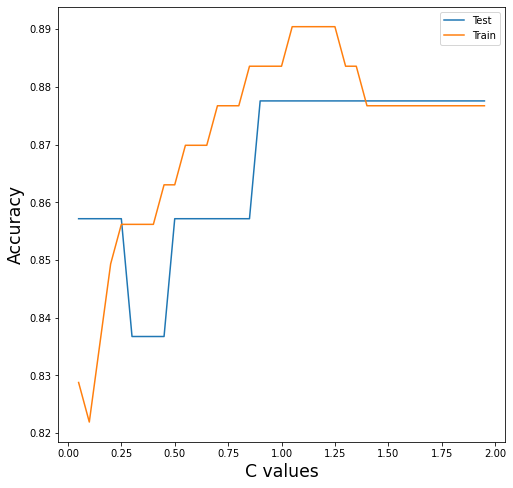

In [42]:
plt.figure(figsize=(8,8))
plt.plot(c_vals, test_scores)
plt.plot(c_vals, train_scores)
plt.xlabel('C values', size='xx-large')
plt.ylabel('Accuracy', size='xx-large')
plt.legend(['Test', 'Train'])

At 1.5 the accuracy for each set is the same, showing that there is likely to be overfit to the training data.